## Exercise 44: Generate the Feature Importance of the Target Variable and Carry Out EDA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import time
import re
import os
import matplotlib.pyplot as plt
sns.set(style="ticks")



# read the downloaded input data (marketing data)
df = pd.read_csv('bank.csv', sep=';')


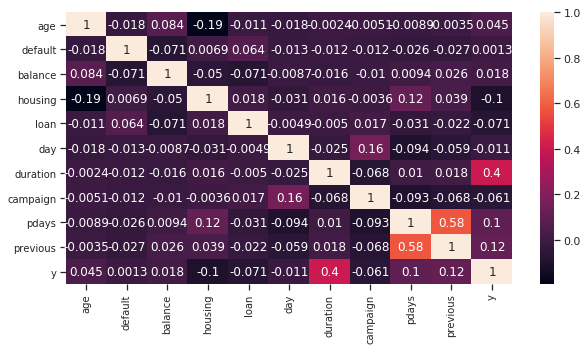

In [2]:
df['y'].replace(['yes','no'],[1,0],inplace=True)
df['default'].replace(['yes','no'],[1,0],inplace=True)
df['housing'].replace(['yes','no'],[1,0],inplace=True)
df['loan'].replace(['yes','no'],[1,0],inplace=True)
corr_df = df.corr()
sns.heatmap(corr_df, xticklabels=corr_df.columns.values, yticklabels=corr_df.columns.values, annot = True, annot_kws={'size':12})
heat_map=plt.gcf(); heat_map.set_size_inches(10,5)
plt.xticks(fontsize=10); plt.yticks(fontsize=10); plt.show()

In [3]:
# import DecisionTreeClassifier from sklearn and 
# BorutaPy from boruta

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
import boruta
# transform all categorical data types to integers (hot-encoding)
for col_name in df.columns:
    if(df[col_name].dtype == 'object'):
        df[col_name]= df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes

# generate separate dataframes for IVs and DV (target variable)
X = df.drop(['y'], axis=1).values
Y = df['y'].values

# build RandomForestClassifier, Boruta models and
# related parameter
rfc = RandomForestClassifier(n_estimators=200, n_jobs=4, class_weight='balanced', max_depth=6)
boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2)
n_train = len(X)

# fit Boruta algorithm
boruta_selector.fit(X, Y)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	6
Iteration: 	9 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	6
Iteration: 	10 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	6
Iteration: 	11 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	6
Iteration: 	12 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	6
Iteration: 	13 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	6
Iteration: 	14 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	6
Iteration: 	15 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	6
Iteration: 	16 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	7
Iteration:

BorutaPy(alpha=0.05,
     estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=6, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=70, n_jobs=4, oob_score=False,
            random_state=<mtrand.RandomState object at 0x7f423428bdc8>,
            verbose=0, warm_start=False),
     max_iter=100, n_estimators='auto', perc=100,
     random_state=<mtrand.RandomState object at 0x7f423428bdc8>,
     two_step=True, verbose=2)

,features,rank
0,age,1
1,balance,1
2,contact,1
3,month,1
4,duration,1
5,pdays,1
6,previous,1
7,poutcome,1
8,housing,2
9,day,3


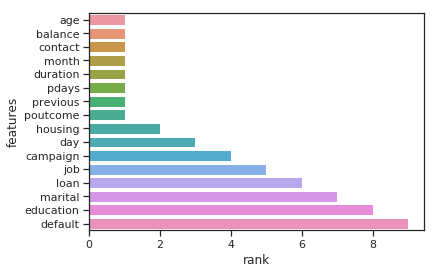

In [4]:
# check ranking of features

feature_df = pd.DataFrame(df.drop(['y'], axis=1).columns.tolist(), columns=['features'])
feature_df['rank']=boruta_selector.ranking_
feature_df = feature_df.sort_values('rank', ascending=True).reset_index(drop=True)
sns.barplot(x='rank',y='features',data=feature_df)
feature_df

